K-Nearest Neighbors (KNN) Implementation

In [17]:
import os 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [18]:
#Reading in the data
os.chdir(r"C:\Users\mmath\OneDrive\Desktop\Capstone\HERC_Sp25\0_Datasets\1.7Master_Files\Individual Year Files_Take2")
df = pd.read_csv("merged_2023.csv")

# Step 1: Dropping Useless Columns. Columns are useless if: 
* Have 50% or more missing values 
* Are numerator / denominator values 

In [19]:
def calculate_missing_percentage(df):
    """
    Function to calculate the percentage of missing values in each column of a given dataset.
    
    Parameters:
        df (pd.DataFrame): The dataset as a pandas DataFrame.
    
    Returns:
        pd.Series: A Series with column names as index and percentage of missing values as values.
    """
    missing_percentage = (df.isna().sum() / len(df)) * 100
    missing_percentage = missing_percentage[missing_percentage > 0]  # Only keep columns with missing values
    
    return missing_percentage.sort_values(ascending=False)  # Sort in descending order
def drop_columns(df, threshold=50):
    """
    Function to drop columns with missing values exceeding a specified threshold
    and columns containing 'numerator' or 'denominator' in their names. These columsn are going to be fairly useless for analysis 
    
    Parameters:
        df (pd.DataFrame): The dataset as a pandas DataFrame.
        threshold (float): The percentage threshold for dropping columns.
    
    Returns:
        pd.DataFrame: The dataframe with columns dropped.
    """
    print(f"Original Dataset Shape: {df.shape}")
    missing_percentage = calculate_missing_percentage(df)
    cols_to_drop = set(missing_percentage[missing_percentage >= threshold].index)
    
    # Drop columns containing 'numerator' or 'denominator' (case-insensitive)
    cols_to_drop.update([col for col in df.columns if 'numerator' in col.lower() or 'denominator' in col.lower()])
    
    resulting_df = df.drop(columns=cols_to_drop)
    print(f"Dropped Dataset Shape: {resulting_df.shape}")
    return resulting_df

clean_df = drop_columns(df)
clean_df.shape

Original Dataset Shape: (1209, 6553)
Dropped Dataset Shape: (1209, 2118)


(1209, 2118)

(array([249., 124., 416., 347., 308., 152.,  89.,  27.,  98., 115.]),
 array([0.00248139, 0.05202647, 0.10157155, 0.15111663, 0.2006617 ,
        0.25020678, 0.29975186, 0.34929694, 0.39884202, 0.4483871 ,
        0.49793218]),
 <BarContainer object of 10 artists>)

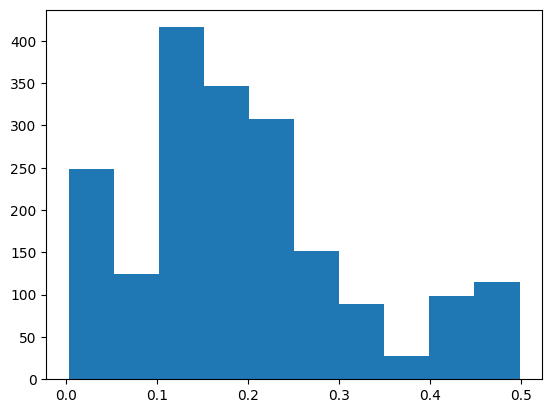

In [20]:
plt.hist(calculate_missing_percentage(clean_df) / 100)

Step1 Results: Data went from (1209, 6553) --> (1209, 2118)

In [21]:
clean_df.columns

Index(['DISTRICT_id', 'District 2022 Attendance: All Students Days Present',
       'District 2022 Attendance: Two or More Races Days Present',
       'District 2022 Attendance: African American Days Present',
       'District 2022 Attendance: Hispanic Days Present',
       'District 2022 Attendance: White Days Present',
       'District 2022 Attendance: Econ Disadv Days Present',
       'District 2022 Attendance: Special Ed Days Present',
       'District 2022 Attendance: Female Days Present',
       'District 2022 Attendance: Male Days Present',
       ...
       'District 2023 Domain 1A: Approaches Grade Level STD, Grade 8, Non-Continuous Enrollee, STAAR Science Rate',
       'District 2023 Domain 1A: Meets Grade Level STD, Grade 8, Non-Continuous Enrollee, STAAR Science Rate',
       'District 2023 Domain 1A: Masters Grade Level STD, Grade 8, Non-Continuous Enrollee, STAAR Science Rate',
       'District', 'District Number', 'TEA District Type', 'TEA Description',
       'NCES Dist